In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [13]:

df=pd.read_csv('Mall_Customers.csv')

In [14]:

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [15]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
results = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    sil_score = silhouette_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)
    
    results.append({'K': k, 'Silhouette Score': sil_score, 'Davies-Bouldin Score': db_score})

In [17]:

score_df = pd.DataFrame(results)
print(score_df)


   K  Silhouette Score  Davies-Bouldin Score
0  2          0.335472              1.260682
1  3          0.357793              1.050270
2  4          0.403958              0.930796
3  5          0.416643              0.874551


In [18]:
best_k = score_df.loc[score_df['Silhouette Score'].idxmax(), 'K']
print(f"Best K based on silhouette score: {best_k}")

Best K based on silhouette score: 5


In [19]:

kmeans_best = KMeans(n_clusters=int(best_k), random_state=42, n_init=10)
labels_best = kmeans_best.fit_predict(X_scaled)

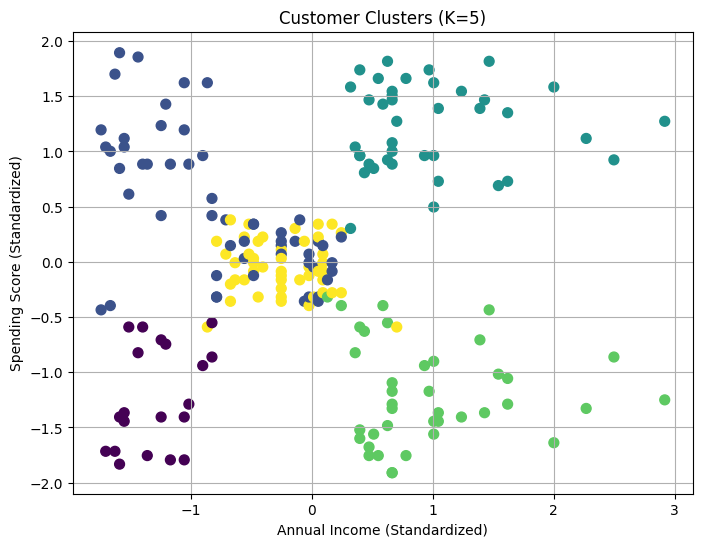

In [20]:

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=labels_best, cmap='viridis', s=50)
plt.xlabel("Annual Income (Standardized)")
plt.ylabel("Spending Score (Standardized)")
plt.title(f"Customer Clusters (K={int(best_k)})")
plt.grid(True)
plt.show()


In [21]:
print("Final Table of Scores:")
print(score_df.to_string(index=False))

Final Table of Scores:
 K  Silhouette Score  Davies-Bouldin Score
 2          0.335472              1.260682
 3          0.357793              1.050270
 4          0.403958              0.930796
 5          0.416643              0.874551


In [22]:

print("\n Analysis:")
print("Silhouette Score is higher when clusters are well-separated and compact.")
print("Davies-Bouldin Score is lower when clusters are more distinct and far apart.")
print("In this case, silhouette score provided a clearer distinction between K values.")



 Analysis:
Silhouette Score is higher when clusters are well-separated and compact.
Davies-Bouldin Score is lower when clusters are more distinct and far apart.
In this case, silhouette score provided a clearer distinction between K values.
